In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
from helpers import *
from plots import *
from implementations import *
from preprocessing import *
from preprocessing_naive import *

%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
# Load the training data into feature matrix, class labels, and event ids:
features, x_train, x_test, y_train, train_ids, test_ids = load_csv_data("data/dataset")

# Split data into train and validation sets
def split_data(x, y, ratio, seed=1):
    """split the dataset based on the split ratio."""
    np.random.seed(seed)
    indices = np.random.permutation(len(y))
    split = int(len(y) * ratio)
    training_idx, test_idx = indices[:split], indices[split:]
    return x[training_idx], y[training_idx], x[test_idx], y[test_idx]

ratio = 0.8
x_train, y_train, x_val, y_val = split_data(x_train, y_train, ratio, seed=1)

In [3]:
print(np.shape(features))
print(np.shape(x_train))
print(np.shape(y_train))
print(np.shape(x_val))
print(np.shape(y_val))
print(np.shape(x_test))

(321,)
(262508, 321)
(262508,)
(65627, 321)
(65627,)
(109379, 321)


In [4]:
# Show the first 5 rows of the data and statistics
pd.set_option('display.max_columns', None)
data = pd.DataFrame(x_train, columns=features)

data.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,LADULT,NUMADULT,NUMMEN,NUMWOMEN,CTELNUM1,CELLFON2,CADULT,PVTRESD2,CCLGHOUS,CSTATE,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUITJU1,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAIN,SEATBELT,FLUSHOT6,FLSHTMY2,IMFVPLAC,PNEUVAC3,HIVTST6,HIVTSTD3,WHRTST10,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,CAREGIV1,CRGVREL1,CRGVLNG1,CRGVHRS1,CRGVPRB1,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,VIDFCLT2,VIREDIF3,VIPRFVS2,VINOCRE2,VIEYEXM2,VIINSUR2,VICTRCT4,VIGLUMA2,VIMACDG2,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,WTCHSALT,LONGWTCH,DRADVISE,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,TETANUS,HPVADVC2,HPVADSHT,SHINGLE2,HADMAM,HOWLONG,HADPAP2,LASTPAP2,HPVTEST,HPLSTTST,HADHYST2,PROFEXAM,LENGEXAM,BLDSTOOL,LSTBLDS3,HADSIGM3,HADSGCO1,LASTSIG3,PCPSAAD2,PCPSADI1,PCPSARE1,PSATEST1,PSATIME,PCPSARS1,PCPSADE1,PCDMDECN,SCNTMNY1,SCNTMEL1,SCNTPAID,SCNTWRK1,SCNTLPAD,SCNTLWK1,SXORIENT,TRNSGNDR,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,EMTSUPRT,LSATISFY,ADPLEASR,ADDOWN,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,ADMOVE,MISTMNT,ADANXEV,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT,_RFHLTH,_HCVU651,_RFHYPE5,_CHOLCHK,_RFCHOL,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA1_,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_MISFRTN,_MISVEGN,_FRTRESP,_VEGRESP,_FRUTSUM,_VEGESUM,_FRTLT1,_VEGLT1,_FRT16,_VEG23,_FRUITEX,_VEGETEX,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,35.0,10.0,10072015.0,10.0,7.0,2015.0,1100.0,2.015004e+09,2.015004e+09,1.0,1.0,NaN,1.0,2.0,NaN,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,30.0,88.0,30.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0,2.0,NaN,2.0,2.0,2.0,1.0,2.0,2.0,4.0,NaN,2.0,1.0,6.0,1.0,2.0,NaN,1.0,2.0,7.0,88.0,99.0,1.0,180.0,502.0,NaN,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,3.0,888.0,NaN,NaN,NaN,203.0,203.0,203.0,555.0,203.0,201.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,888.0,1.0,2.0,1.0,10.0,1.0,2.0,NaN,NaN,1.0,2.0,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,5.0,351051.0,17.109993,2.0,34.219987,9.0,NaN,NaN,NaN,1.0,0.726059,76.345588,2.0,9.0,2.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,12.0,2.0,78.0,6.0,62.0,1.57,81.65,32.92,4.0,2.0,1.0,4.0,9.0,4.0,1.0,2.0,0.0,1.0,0.0,1.0,0.43,0.43,0.43,0.00,0.43,0.14,0.0,0.0,1.0,1.0,0.86,1.00,2.0,1.0,1.0,1.0,0.0,0.0,2.0,NaN,NaN,19.14,

In [5]:
data.describe()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,LADULT,NUMADULT,NUMMEN,NUMWOMEN,CTELNUM1,CELLFON2,CADULT,PVTRESD2,CCLGHOUS,CSTATE,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUITJU1,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAIN,SEATBELT,FLUSHOT6,FLSHTMY2,IMFVPLAC,PNEUVAC3,HIVTST6,HIVTSTD3,WHRTST10,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,CAREGIV1,CRGVREL1,CRGVLNG1,CRGVHRS1,CRGVPRB1,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,VIDFCLT2,VIREDIF3,VIPRFVS2,VINOCRE2,VIEYEXM2,VIINSUR2,VICTRCT4,VIGLUMA2,VIMACDG2,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,WTCHSALT,LONGWTCH,DRADVISE,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,TETANUS,HPVADVC2,HPVADSHT,SHINGLE2,HADMAM,HOWLONG,HADPAP2,LASTPAP2,HPVTEST,HPLSTTST,HADHYST2,PROFEXAM,LENGEXAM,BLDSTOOL,LSTBLDS3,HADSIGM3,HADSGCO1,LASTSIG3,PCPSAAD2,PCPSADI1,PCPSARE1,PSATEST1,PSATIME,PCPSARS1,PCPSADE1,PCDMDECN,SCNTMNY1,SCNTMEL1,SCNTPAID,SCNTWRK1,SCNTLPAD,SCNTLWK1,SXORIENT,TRNSGNDR,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,EMTSUPRT,LSATISFY,ADPLEASR,ADDOWN,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,ADMOVE,MISTMNT,ADANXEV,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT,_RFHLTH,_HCVU651,_RFHYPE5,_CHOLCHK,_RFCHOL,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA1_,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_MISFRTN,_MISVEGN,_FRTRESP,_VEGRESP,_FRUTSUM,_VEGESUM,_FRTLT1,_VEGLT1,_FRT16,_VEG23,_FRUITEX,_VEGETEX,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
count,262508.000000,262508.000000,2.625080e+05,262508.000000,262508.000000,262508.000000,262508.000000,2.625080e+05,2.625080e+05,151064.0,151064.000000,25.0,151063.0,151064.000000,25.000000,151049.000000,150973.000000,150972.000000,111444.0,111444.0,111443.000000,111444.000000,629.0,111444.000000,110970.000000,108376.000000,262506.000000,262507.000000,262508.000000,134767.000000,262508.000000,262508.000000,262507.000000,262507.000000,262507.000000,105441.000000,262508.000000,227414.000000,227414.000000,262508.000000,262508.000000,35224.000000,262508.000000,262508.000000,262508.000000,262508.000000,262508.000000,262508.000000,262503.000000,33724.000000,262508.000000,262508.000000,262508.000000,262508.000000,151064.000000,7911.000000,151064.000000,262507.000000,262508.000000,262506.000000,260543.000000,259951.000000,259366.000000,259003.000000,38922.000000,256985.000000,256338.000000,255911.000000,255566.000000,255228.000000,254998.000000,254660.000000,254118.000000,109558.000000,36628.000000,72645.000000,253764.000000,253167.000000,125866.000000,125615.000000,125364.000000,245968.000000,245317.000000,244572.000000,244014.000000,243523.000000,242930.000000,241574.000000,176210.00000,175181.000000,174986.000000,174765.000000,117692.000000,11758

In [6]:
data_labeled = pd.DataFrame(np.concatenate((x_train, y_train.reshape(-1,1)), axis=1), columns=np.append(features, ["label"]))
stats_corr = data_labeled.corr()[-1:]

stats_corr

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,LADULT,NUMADULT,NUMMEN,NUMWOMEN,CTELNUM1,CELLFON2,CADULT,PVTRESD2,CCLGHOUS,CSTATE,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUITJU1,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAIN,SEATBELT,FLUSHOT6,FLSHTMY2,IMFVPLAC,PNEUVAC3,HIVTST6,HIVTSTD3,WHRTST10,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,CAREGIV1,CRGVREL1,CRGVLNG1,CRGVHRS1,CRGVPRB1,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,VIDFCLT2,VIREDIF3,VIPRFVS2,VINOCRE2,VIEYEXM2,VIINSUR2,VICTRCT4,VIGLUMA2,VIMACDG2,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,WTCHSALT,LONGWTCH,DRADVISE,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,TETANUS,HPVADVC2,HPVADSHT,SHINGLE2,HADMAM,HOWLONG,HADPAP2,LASTPAP2,HPVTEST,HPLSTTST,HADHYST2,PROFEXAM,LENGEXAM,BLDSTOOL,LSTBLDS3,HADSIGM3,HADSGCO1,LASTSIG3,PCPSAAD2,PCPSADI1,PCPSARE1,PSATEST1,PSATIME,PCPSARS1,PCPSADE1,PCDMDECN,SCNTMNY1,SCNTMEL1,SCNTPAID,SCNTWRK1,SCNTLPAD,SCNTLWK1,SXORIENT,TRNSGNDR,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,EMTSUPRT,LSATISFY,ADPLEASR,ADDOWN,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,ADMOVE,MISTMNT,ADANXEV,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT,_RFHLTH,_HCVU651,_RFHYPE5,_CHOLCHK,_RFCHOL,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA1_,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_MISFRTN,_MISVEGN,_FRTRESP,_VEGRESP,_FRUTSUM,_VEGESUM,_FRTLT1,_VEGLT1,_FRT16,_VEG23,_FRUITEX,_VEGETEX,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,label
label,0.005662,0.007232,0.006248,0.006857,-0.025774,-0.014937,-0.018082,-0.05061,-0.05061,NaN,0.002156,NaN,NaN,0.012006,-0.402309,-0.061491,-0.021558,-0.067968,NaN,NaN,-0.063922,-0.017545,NaN,-0.022887,-0.039055,-0.007962,0.245301,-0.09857,-0.00793,-0.056017,-0.025169,-0.042296,-0.009871,-0.052097,-0.204321,-0.080563,-0.051227,-0.073132,-0.113989,-0.099584,-0.031688,-0.03463,-0.055957,-0.058682,-0.091229,-0.122806,-0.040656,-0.051741,-0.162082,0.047286,-0.072266,-0.029212,-0.083024,-0.012236,0.000034,0.008132,0.037568,-0.089739,0.207984,0.114296,0.000719,0.108834,-0.024289,-0.016549,0.010364,-0.118197,-0.136054,-0.045831,-0.042678,-0.135624,-0.058759,-0.06782,-0.076702,0.041316,-0.035369,0.010273,-0.004281,0.087465,0.006807,0.051795,-0.003018,-0.000744,0.029284,0.02256,0.049067,0.018245,0.019764,0.046274,0.028955,0.026272,0.007991,0.044835,0.034489,0.029938,0.067037,-0.062552,-0.005966,-0.092589,0.041062,0.019973,-0.054905,0.008616,-0.042886,-0.102892,0.026576,0.047723,0.016172,-0.027604,-0.058427,-0.084509,-0.050845,-0.031855,0.03114,0.02912,-0.011565,-0.017717,-0.042929,-0.010709,0.004715,0.019179,0.030217,0.036264,0.00145,0.007863,0.008446,-0.001796,0.020694,0.083718,0.063878,0.005768,0.026021,-0.041246,0.009026,-0.097667,0.007352,-

Highest correlations:  [  7   8  14  15  17  20  26  27  29  33  34  35  36  37  38  39  42  43
  44  45  47  48  50  52  57  58  59  61  65  66  69  70  71  72  77  79
  84  94  95  97 100 103 108 109 110 127 128 133 137 138 140 142 144 145
 147 150 153 154 157 158 159 162 170 173 175 176 178 188 190 193 194 197
 207 209 213 216 223 229 230 231 232 233 234 238 246 247 248 249 252 253
 254 256 257 258 259 289 302 304 313 315]


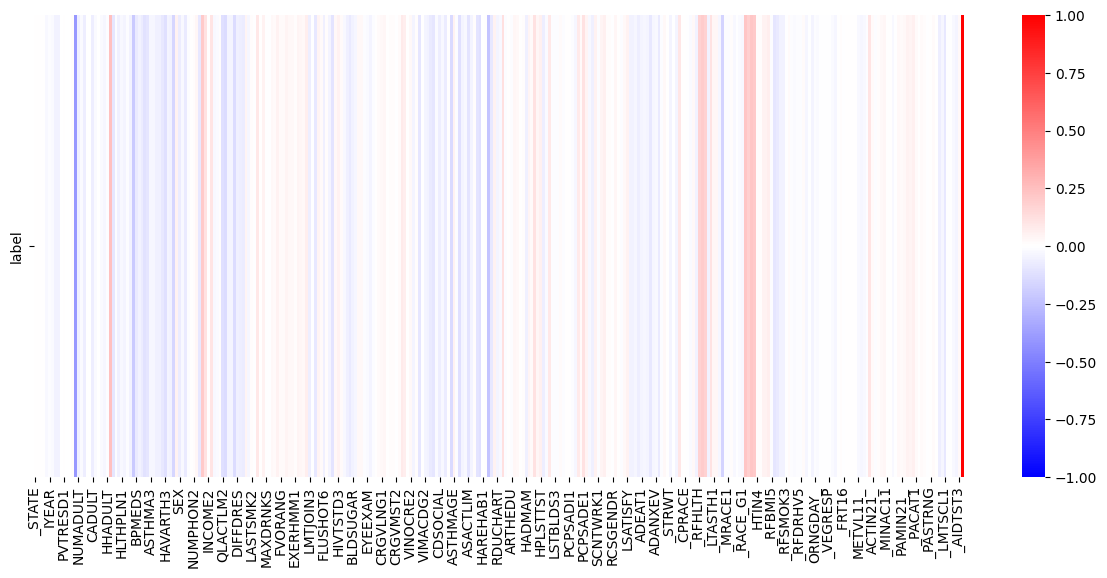

In [7]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.heatmap(stats_corr, ax=ax, cmap="bwr", vmin=-1, vmax=1)

# Print names of features with highest correlation with label
corr = stats_corr.values[0]

# Replace NaN with 0, as correlation impossible to determine
corr = np.nan_to_num(corr)

corr = np.abs(corr)
corr = corr[:-1]
corr = np.argsort(corr)
corr = corr[::-1]
corr = corr[:100]

# Print features with highest correlation with label
print("Highest correlations: ", np.sort(corr))


# Preprocess the data

In [49]:
# Preprocessing of the data (standardization, outliers, ...)
new_x_train, mean, std = preprocessing_dataset(x_train)

def pca(data):
    # compute the mean of each column
    mean = np.mean(data, axis=0)
    mean_data = data - mean

    # compute the covariance matrix
    cov = np.cov(data,rowvar=False)
    cov = np.round(cov, 2)
    

    # compute the eigenvalues and eigenvectors
    eig_val, eig_vec = np.linalg.eig(cov)

    # sort the eigenvalues and eigenvectors
    idx = np.arange(0, len(eig_val), 1)
    idx = ([x for _, x in sorted(zip(eig_val, idx))])[::-1]
    eig_val = eig_val[idx]
    eig_vec = eig_vec[:, idx]

    print("eig_vec",eig_vec.shape)

    # compute the explained variance
    exp_var = eig_val/np.sum(eig_val)

    # compute the cumulative explained variance
    cum_exp_var = np.cumsum(exp_var)

    #get the index of the first value above 99%
    index = np.argmax(cum_exp_var > 0.99)

    #get the number of components
    n_components = index + 1

    #get the components
    components = eig_vec[:, :n_components]

    #transform the data
    transformed_data = np.dot(mean_data, components)

    return transformed_data, mean, components

# new_x_train, pca_mean, components = pca(new_x_train)

new_x_train = [new_x_train[18]]

print(np.shape(new_x_train))

np.set_printoptions(suppress=True, precision=3)
data = pd.DataFrame(new_x_train)
data.describe()
    

124
(262508, 124)
(262508, 205)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204
count,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05,2.625080e+05
mean,1.606454e-17,9.983836e-17,-4.024107e-15,-6.375127e-15,-6.037124e-13,3.006073e-14,8.978280e-17,-8.339487e-17,-2.951695e-13,5.745182e-13,1.777656e-17,1.385178e-17,-4.141323e-18,-8.616929e-17,-1.391539e-16,-5.935219e-17,4.579011e-15,-1.047483e-13,7.157734e-14,-5.685839e-14,4.330960e-14,-7.094824e-14,1.511644e-14,-1.145834e-16,1.767536e-13,-1.619988e-17,1.804534e-15,2.347573e-13,-3.457126e-13,-9.207000e-17,8.248615e-13,4.560869e-18,-9.935162e-13,1.256502e-12,-1.512224e-13,-7.829428e-13,1.955625e-17,-1.619988e-17,5.792100e-17,2.303442e-17,2.182991e-17,-6.868370e-19,5.592139e-17,1.868618e-14,1.543735e-14,-7.0080

In [14]:
feature_visualization(new_x_train, y_train)

Feature 0
Feature 1
Feature 2
Feature 3
Feature 4
Feature 5
Feature 6
Feature 7
Feature 8
Feature 9
Feature 10
Feature 11
Feature 12
Feature 13
Feature 14
Feature 15
Feature 16
Feature 17
Feature 18
Feature 19
Feature 20
Feature 21
Feature 22
Feature 23
Feature 24
Feature 25
Feature 26
Feature 27
Feature 28
Feature 29
Feature 30
Feature 31
Feature 32
Feature 33
Feature 34
Feature 35
Feature 36
Feature 37
Feature 38
Feature 39
Feature 40
Feature 41
Feature 42
Feature 43
Feature 44
Feature 45
Feature 46
Feature 47
Feature 48
Feature 49
Feature 50
Feature 51
Feature 52
Feature 53
Feature 54
Feature 55
Feature 56
Feature 57
Feature 58
Feature 59
Feature 60
Feature 61
Feature 62
Feature 63
Feature 64
Feature 65
Feature 66
Feature 67
Feature 68
Feature 69
Feature 70
Feature 71
Feature 72
Feature 73
Feature 74
Feature 75
Feature 76
Feature 77
Feature 78
Feature 79
Feature 80
Feature 81
Feature 82
Feature 83
Feature 84
Feature 85
Feature 86
Feature 87
Feature 88
Feature 89
Feature 90
Feature 9

# Build the model

In [57]:
# Define the parameters of the algorithm.
max_iters = 100
gamma = 0.02

# Initialization
w_initial = np.zeros((new_x_train.shape[1],))

# Start gradient descent.
start_time = datetime.datetime.now()
# gd_ws, gd_losses = least_squares(y_train, new_x_train)
# gd_ws, gd_losses = ridge_regression(y_train, new_x_train, 0.3)
gd_ws, gd_losses = mean_squared_error_gd(y_train, new_x_train, w_initial, max_iters, gamma)
# gd_ws, gd_losses = logistic_regression(y_train, new_x_train, w_initial, max_iters, gamma)
# gd_ws, gd_losses = reg_logistic_regression(y_train, new_x_train, 0.1, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))
print("Gradient Descent: loss={l}".format(l=gd_losses))
print("Gradient Descent: w={w}".format(w=gd_ws))

GD iter. 0/99: loss=0.5, w0=-0.0003442741789616495, w1=0.002897316940275713
GD iter. 1/99: loss=0.4832285443551651, w0=-0.0004203848689517702, w1=0.004346803175175736
GD iter. 2/99: loss=0.4806800331825925, w0=-0.0004119779591817591, w1=0.005306643219292012
GD iter. 3/99: loss=0.47976501786932085, w0=-0.0003770684105983282, w1=0.006076471580028593
GD iter. 4/99: loss=0.47918989867465317, w0=-0.00033430889156828964, w1=0.006752758334862627
GD iter. 5/99: loss=0.47877366862676235, w0=-0.00028985887272752256, w1=0.007369148121872307
GD iter. 6/99: loss=0.47846140650310764, w0=-0.0002458159847494078, w1=0.007939619667730925
GD iter. 7/99: loss=0.47822256663357754, w0=-0.00020290090386379327, w1=0.008471729179313619
GD iter. 8/99: loss=0.4780368688235761, w0=-0.00016133655558511138, w1=0.008970676603537252
GD iter. 9/99: loss=0.47789025098308024, w0=-0.00012115072352744624, w1=0.009440572922875857
GD iter. 10/99: loss=0.4777727713813058, w0=-8.228880728530528e-05, w1=0.009884860736707888
GD

KeyboardInterrupt: 

# Test the model

In [51]:
new_x_val = preprocessing_dataset_test(x_val, mean, std)
# new_x_val = np.dot(new_x_val - pca_mean, components)

Precision:  0.17398119122257052
Recall:  0.03920183648242981
Accuracy:  0.9010315876087586
F1 score:  0.06398616515348032


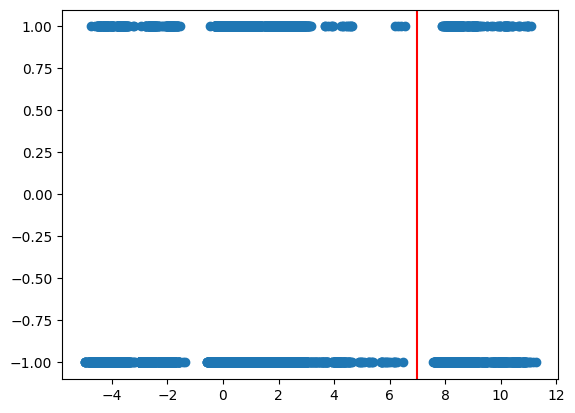

In [53]:
y_pred = new_x_val @ gd_ws

threshold = 7

plt.axvline(x=threshold, color='r', linestyle='-')
plt.scatter(y_pred, y_val)

y_pred[y_pred < threshold] = -1
y_pred[y_pred >= threshold] = 1

def precision(y_pred, y_test):
    return np.sum(y_pred[y_pred == 1] == y_test[y_pred == 1]) / np.sum(y_pred == 1)

def recall(y_pred, y_test):
    return np.sum(y_pred[y_test == 1] == y_test[y_test == 1]) / np.sum(y_test == 1)

def accuracy(y_pred, y_test):
    return np.sum(y_pred == y_test) / len(y_test)

def f1_score(y_pred, y_test):
    prec = precision(y_pred, y_test)
    rec = recall(y_pred, y_test)
    return 2 * prec * rec / (prec + rec)

print("Precision: ", precision(y_pred, y_val))
print("Recall: ", recall(y_pred, y_val))
print("Accuracy: ", accuracy(y_pred, y_val))
print("F1 score: ", f1_score(y_pred, y_val))

# Create Submission

In [234]:
new_x_test = preprocessing_dataset_test(x_test, mean, std)
new_x_test = np.dot(new_x_test - pca_mean, components)
y_pred = new_x_test @ gd_ws
y_pred[y_pred < threshold] = -1
y_pred[y_pred >= threshold] = 1

create_csv_submission(test_ids, y_pred, "data/submission_gd.csv")